# Credit score classification, Part 1: Data Cleaning  

## Problem Statement :

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

## Task:

Given a person’s credit-related information, build a machine learning model that can classify the credit score.

### import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the training and test datasets

In [2]:
df = pd.read_csv("train.csv", low_memory=False)
df1= pd.read_csv("test.csv", low_memory=False)

### Check the shape of the datasets

In [3]:
df.shape

(100000, 28)

In [4]:
df1.shape

(50000, 27)

Concatenate the training and test datasets so that we can clean it together

In [5]:
df = pd.concat([df,df1])

Display the first few rows of the dataset

In [6]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


###  Basic info on dataset

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  ob

None

# Insights:
- We have 4 float columns , 4 int columns , and 20 object columns. need to look more into object columns.

### Drop unnecessary columns

In [8]:
df.drop(['ID', 'Customer_ID'], axis =1, inplace=True )

### Let's see how Name column is driving the dataset.

In [9]:
df.groupby(['Name']).sum(numeric_only=False)

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Name,,,,,,,,,,,,,,,,,,,,,
Mattr,JanuaryFebruaryMarchAprilMayJulyAugustSeptembe...,1919202020202020_2020,892-22-1956#F%$D@*&8892-22-1956892-22-1956892-...,MechanicMechanicMechanicMechanicMechanic______...,15411.9315411.9315411.9315411.9315411.9315411....,10042.620000,70,100,320,4444444444,...,StandardStandardStandardStandard_Standard_Stan...,2084.962084.962084.962084.962084.962084.962084...,300.493694,15 Years and 3 Months15 Years and 4 Months15 Y...,NMYesYesYesYesYesYesYesNMYes,340.079643,96.9077621485204572.50326309942025150.82793560...,Low_spent_Medium_value_paymentsLow_spent_Small...,297.26896241681976284.6170235757184299.0215226...,PoorPoorPoorPoorPoorPoorPoor
Mattx,JanuaryFebruaryMarchAprilMayAugustSeptemberOct...,2929_2929292929303030,609-98-6953609-98-6953609-98-6953#F%$D@*&8609-...,LawyerLawyerLawyerLawyerLawyerLawyerLawyer____...,8393.968393.968393.968393.968393.968393.968393...,7804.966667,50,50,320,2222222222,...,__StandardStandardStandard_Standard_StandardSt...,1402.781402.781402.781402.781402.781402.781402...,340.878078,13 Years and 10 Months13 Years and 11 Months14...,YesYesYesYesNMYesYesYesYesYes,80.251076,67.9396738281883852.45771224397097418.25324025...,Low_spent_Small_value_paymentsHigh_spent_Small...,292.08488523190437315.6946281305281297.5668468...,StandardStandardPoorStandardStandardPoor
Stevei,JanuaryFebruaryMarchAprilMayJulyAugustSeptembe...,34343434353535353535,402-04-1025402-04-1025402-04-1025402-04-102540...,JournalistJournalistJournalistJournalistJourna...,36048.0836048.0836048.08_36048.0836048.0836048...,23592.053333,30,70,140,2222222222,...,Standard_StandardStandardStandardStandard_Stan...,571.06571.06571.06571.06571.06571.06571.06571....,357.807064,13 Years and 7 Months13 Years and 8 Months13 Y...,YesYesYesYesYesYesYesYesNMYes,457.726357,106.5466364683387242.872471818073095142.711397...,Low_spent_Small_value_payments!@9#%8High_spent...,432.5813945338121456.25555918407775366.4166336...,StandardStandardStandardStandardStandardStanda...
Stevep,JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...,4242424242424242434343,396-73-6429396-73-6429396-73-6429396-73-6429#F...,Media_ManagerMedia_ManagerMedia_ManagerMedia_M...,33461.2433461.2433461.2433461.2433461.2433461....,29649.803333,55,1213,3681,22222222222,...,StandardStandardStandardStandard__StandardStan...,1048.02_1048.021048.021048.021048.02_1048.0210...,351.943933,20 Years and 2 Months20 Years and 3 Months20 Y...,YesYesYesYesYesNMYesYesYesNMYes,596.610260,48.38846919157242103.80312076818892162.4192128...,!@9#%8High_spent_Medium_value_payments!@9#%8!@...,406.91790111040535361.5032495337889280.0053476...,StandardStandardStandardStandardStandardStanda...
Thomasf,JanuaryMarchAprilMayJuneJulyAugustSeptemberNov...,43444444444444444444,303-19-1557303-19-1557303-19-1557303-19-155730...,Media_ManagerMedia_ManagerMedia_ManagerMedia_M...,74538.8774538.8774538.8774538.8774538.8774538....,56525.152500,80,50,2388,000_0000000,...,_StandardStandardStandardStandardStandardStand...,1433.431433.431433.431433.431433.431433.431433...,352.613585,21 Years and 10 Months21 Years and 11 Months22...,NoNMNoNoNMNoNoNoNoNo,0.000000,183.40666856082672624.6953689811063523.5491058...,Low_spent_Large_value_payments!@9#%8Low_spent_...,714.6505814391733293.3618810188937384.50814410...,StandardStandardStandardStandardStandardStanda...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tg,JanuaryFebruaryMarchAprilMayJuneJulyAugustOcto...,2121212122222222_222222,289-20-3745289-20-3745289-20-3745289-20-374528...,TeacherTeacherTeacherTeacherTeacherTeacherTeac...,36401.3636401.3636401.3636401.3636401.3636401....,32314.466667,44,55,3226,6-10066_6666666,

## Insight:
- We can see that we have data from jan to Aug for same person.
- we can clean SSN columns on the basis of name.
- we can clean Occupation false data points on the basis of name.
- we can clean anual income data based on name.
- we will check and try to clean more column son the basis of name.


# Data Cleaning

## Cleaning Annual_Income column based of Name column

In [10]:
df.groupby(['Name'])['Annual_Income'].unique()

Name
 Mattr              [15411.93, 15411.93_]
 Mattx                          [8393.96]
 Stevei             [36048.08, 36048.08_]
 Stevep                        [33461.24]
 Thomasf                       [74538.87]
                        ...              
tg                             [36401.36]
ty                             [32228.67]
yi          [58295.16, 59134.0, 59134.0_]
yk                  [41026.38_, 41026.38]
yv                   [16819.98, 8898.785]
Name: Annual_Income, Length: 10139, dtype: object

we can see there are more than one value for some names and there is a '_' after value thats the error.

### Clean the "Annual_Income" column based on the "Name" column

In [11]:
df['Annual_Income']= df.groupby(['Name'])['Annual_Income'].transform(lambda x: x.str.replace('_', ''))

In [12]:
df.groupby(['Name'])['Annual_Income'].unique()

Name
 Mattr                [15411.93]
 Mattx                 [8393.96]
 Stevei               [36048.08]
 Stevep               [33461.24]
 Thomasf              [74538.87]
                    ...         
tg                    [36401.36]
ty                    [32228.67]
yi           [58295.16, 59134.0]
yk                    [41026.38]
yv          [16819.98, 8898.785]
Name: Annual_Income, Length: 10139, dtype: object

still we have 2 values for some names. Means there are different people with same names.

## Cleaning Occupation column based of Name column

In [13]:
df['naan'] = df['Name'] + '_' + df['Annual_Income'] 

made a new column with adding name and annual_income so that all people with same name and different incomes can be identified.

In [14]:
df['Occupation'] = df.groupby('naan')['Occupation'].transform(lambda x: x.mode().iat[0])

In [15]:
df.groupby(['Name'])['Occupation'].unique()

Name
 Mattr                     [Mechanic]
 Mattx                       [Lawyer]
 Stevei                  [Journalist]
 Stevep               [Media_Manager]
 Thomasf              [Media_Manager]
                      ...            
tg                          [Teacher]
ty                           [Writer]
yi          [Engineer, Media_Manager]
yk                           [Doctor]
yv           [Entrepreneur, Engineer]
Name: Occupation, Length: 10139, dtype: object

In [16]:
df['Occupation'] = df['Occupation'].str.replace('_______', 'Unknown',regex=False)

## what?
- We grouped all the occupation based on name then we find the mode, means most occuring occupations for a name and then replaced it with all the other values. for a given name.

Now we have filled the missing values while taking consideration that there are same name people with different annual salary and occupations.

### Cleaning SSN column based of Name column

In [17]:
df['naanoc'] = df['Name'] + '_' + df['Annual_Income'] + '_' + df['Occupation']


- we created a new column with name+ pccupation. so now each person with same name with different occupation can be identified.

In [18]:
df['SSN'] = df.groupby('naanoc')['SSN'].transform(lambda x: x.mode().iat[0])

In [19]:
df['SSN'] =df['SSN'].replace(to_replace='#F%$D@*&8',value= np.nan,)

In [20]:
df.groupby(['Name'])['SSN'].unique()

Name
 Mattr                   [892-22-1956]
 Mattx                   [609-98-6953]
 Stevei                  [402-04-1025]
 Stevep                  [396-73-6429]
 Thomasf                 [303-19-1557]
                       ...            
tg                       [289-20-3745]
ty                       [680-76-9610]
yi          [057-95-4768, 564-11-6075]
yk                       [850-06-1322]
yv          [106-55-1522, 644-23-8314]
Name: SSN, Length: 10139, dtype: object

### Insights:
- Cleaned Missing SSN values.
- Now we have unique SSN NUmbers for each person so we can use SSN for cleaning data

### checking missing values

<Axes: >

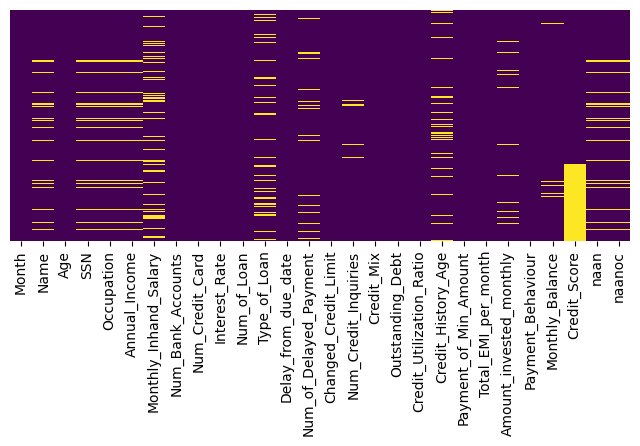

In [21]:
plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Cleaning Monthly Inhand_Salary column based of SSN column

In [22]:
df['Monthly_Inhand_Salary']= df.groupby(['SSN'])['Monthly_Inhand_Salary'].transform(lambda x: x.mode().iat[0])


In [23]:
df.groupby(['SSN'])['Monthly_Inhand_Salary'].unique()

SSN
000-08-1349     [5465.759999999998]
000-40-3312              [3677.295]
000-58-0568     [6766.886666666666]
000-60-0688     [2228.556666666667]
000-63-0442     [5465.076666666667]
                       ...         
999-79-9012     [2230.813333333333]
999-84-9578    [1313.4858333333334]
999-92-7186     [2423.398333333333]
999-95-7259    [1759.9658333333334]
999-99-3421     [733.8945833333332]
Name: Monthly_Inhand_Salary, Length: 12499, dtype: object

### Clean other columns based on the "SSN" column

In [24]:
x = [ 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']
for i in x:
    try :
        df[i] = df.groupby(['SSN'])[i].transform( lambda x: x.mode().iat[0] )
        print("Column: ",i," Is Cleaned")
    except:
        print("Not able to clean column : ",i)
print("**** All Columns Cleaned ****")

Column:  Num_Bank_Accounts  Is Cleaned
Column:  Num_Credit_Card  Is Cleaned
Column:  Interest_Rate  Is Cleaned
Column:  Num_of_Loan  Is Cleaned
Not able to clean column :  Type_of_Loan
Column:  Delay_from_due_date  Is Cleaned
Column:  Num_of_Delayed_Payment  Is Cleaned
Column:  Changed_Credit_Limit  Is Cleaned
Column:  Num_Credit_Inquiries  Is Cleaned
Column:  Credit_Mix  Is Cleaned
Column:  Outstanding_Debt  Is Cleaned
Column:  Credit_Utilization_Ratio  Is Cleaned
Column:  Credit_History_Age  Is Cleaned
Column:  Payment_of_Min_Amount  Is Cleaned
Column:  Total_EMI_per_month  Is Cleaned
Column:  Amount_invested_monthly  Is Cleaned
Column:  Payment_Behaviour  Is Cleaned
Column:  Monthly_Balance  Is Cleaned
**** All Columns Cleaned ****


### Check for missing values again

<Axes: >

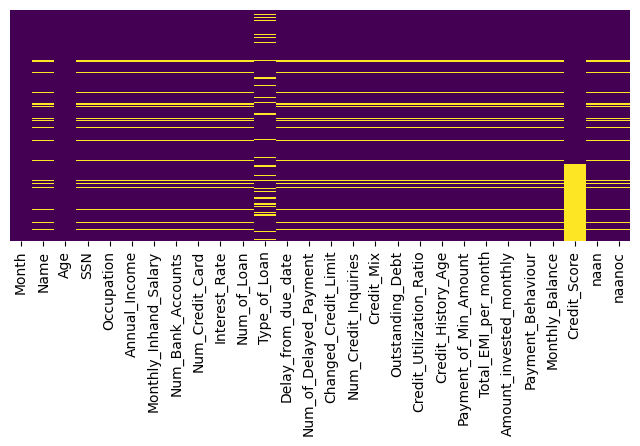

In [25]:
plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Clean the "Type_of_Loan" column

In [26]:
df['Type_of_Loan'] = df.Type_of_Loan.str.split(',').str[0]

In [27]:
df['Type_of_Loan'].unique()

array(['Auto Loan', 'Credit-Builder Loan', 'Not Specified', nan,
       'Personal Loan', 'Payday Loan', 'Mortgage Loan',
       'Home Equity Loan', 'Debt Consolidation Loan', 'Student Loan'],
      dtype=object)

###  for grouping numerical data is needed so encoding 'Type_of_Loan' into numbers 

In [28]:
from sklearn.preprocessing import OrdinalEncoder


df['Type_of_Loan'].fillna('missing', inplace=True)

x = ['Auto Loan', 'Credit-Builder Loan', 'Not Specified', 'missing',
       'Personal Loan', 'Payday Loan', 'Mortgage Loan',
       'Home Equity Loan', 'Debt Consolidation Loan', 'Student Loan']
encoder = OrdinalEncoder(categories=[x])
df['Loan'] = encoder.fit_transform(df[['Type_of_Loan']])

### Made new dataframe by grouping dataframe on some values.

In [29]:
ddf = df.groupby(['Annual_Income', 'Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card'])['Loan'].mean().reset_index()

In [30]:
df1 = df.copy()

### made a copy of existing data do a left join with above dataframe

In [31]:
df1 =pd.merge(df1,ddf, how='left',on=['Annual_Income', 'Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card'])

### replaced the value in original dataset with the value from previous dataframe

In [32]:
df['Loan'] =df['Loan'].replace('missing', np.nan)
df['Loan'] =df['Loan'].fillna(df1['Loan_y'])

### Removed the encoding on 'Type_of_Loan' column done previously

In [33]:

x = {0: 'Auto Loan', 1: 'Credit-Builder Loan', 2: 'Not Specified', 3:'missing',
      4: 'Personal Loan', 5:'Payday Loan', 6:'Mortgage Loan',
       7:'Home Equity Loan', 8:'Debt Consolidation Loan', 9:'Student Loan'}

df['Type_of_Loan'] = df['Loan'].map(x)

In [34]:
pd.isna(df['Type_of_Loan']).sum()

0

**Type_of_Loan Column is also cleaned**

In [35]:
x = pd.isna(df['SSN']).sum()
y = df['SSN'].shape[0]
print("Missing Data: = " ,x)
print("Total Data: = " ,y)
print("Data is courupted: ", (x/y)*100,"%" )

Missing Data: =  15125
Total Data: =  150000
Data is courupted:  10.083333333333332 %


- we are dropping only 10 % of data. Thats fine 

### Split the dataset back into training and test datasets

In [36]:
test  = df[df['Credit_Score'].isna()]

In [37]:
test.drop('Credit_Score',axis=1, inplace=True)
test.dropna(inplace=True)

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_14848\1398534447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Credit_Score',axis=1, inplace=True)
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_14848\1398534447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True)


### Droped all Null values

In [38]:
df.dropna(inplace=True)

<Axes: >

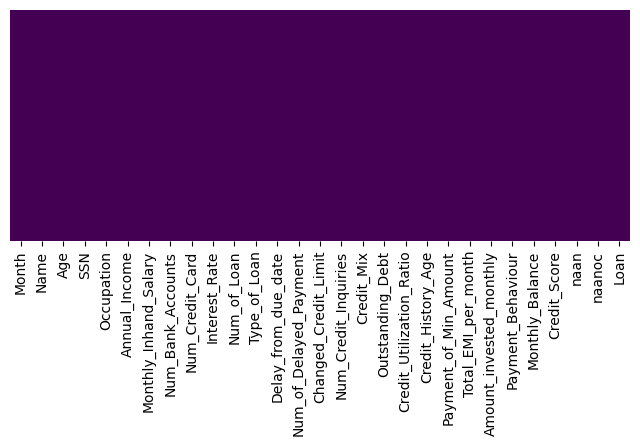

In [39]:
plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

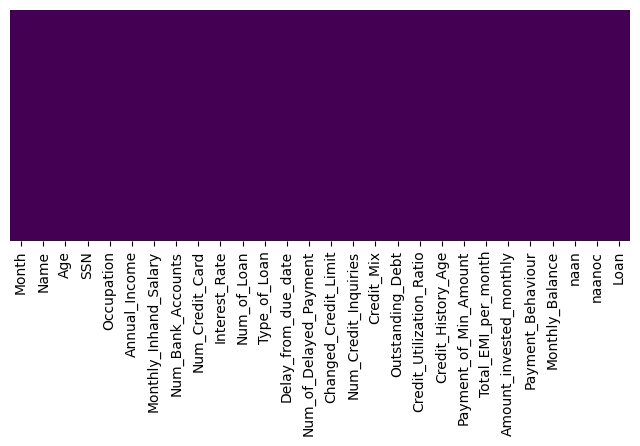

In [40]:
plt.figure(figsize=(8,3))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Data type correction

### Again mearged both dataset for appling more transformations

In [41]:
df = pd.concat([df,test])

### data type correction for Age column.

In [42]:
df['Age'] =df['Age'].str.replace('_', '').str.replace(']', '').str.replace('[', '')
df['Age'] = df['Age'].astype(int)

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_14848\2853690472.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Age'] =df['Age'].str.replace('_', '').str.replace(']', '').str.replace('[', '')


In [43]:
df['Age'].unique()

array([  23, -500,   28, ..., 5586,  326, 7910])

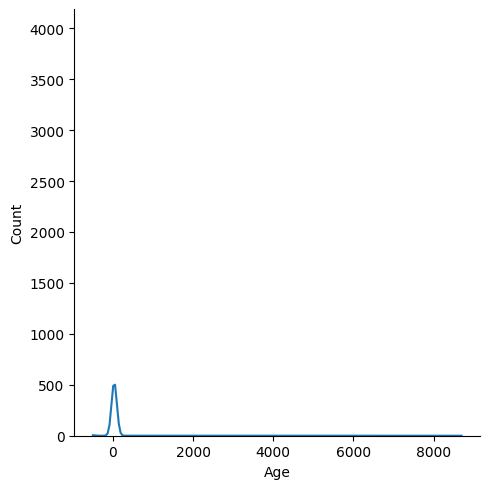

In [44]:
sns.displot(df['Age'], kde=True)

### Age is below 0 and above 70 thats an issue lets solve it

In [45]:
display(df[(df['Age'] > 16)& (df['Age'] < 70)]['Age'].mean())

34.27159983135386

In [46]:
mn =df[(df['Age'] > 16)& (df['Age'] < 70)]['Age'].mean()
mde =df[(df['Age'] > 16)& (df['Age'] < 70)]['Age'].mode()

### randomly filled the wrong age values with values between  mean and mode

In [47]:

def age_p (x, mn=mn, mde=mde):
    if x < 0 or x > 70:
        return np.random.randint(mde,mn+1)
    else : return x
df['Age'] = df['Age'].apply(age_p)    

### Age column is cleaned

### data type correction for Month column.

In [48]:
df['Month'] =df['Month'].replace(to_replace=['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August','September', 'October','November', 'December'],value=[1,2,3,4,5,6,7,8,9,10,11,12])

### data type correction for Annual_Income column.

In [49]:
df['Annual_Income'] =df['Annual_Income'].astype(float)

### data type correction for Monthly_Inhand_Salary column.

In [50]:
df['Monthly_Inhand_Salary'] =df['Monthly_Inhand_Salary'].astype(float)

### data type correction for Num_Bank_Accounts column.

In [51]:
df['Num_Bank_Accounts'].unique()

array([ 3.,  2.,  1.,  7.,  4.,  0.,  8.,  5.,  6.,  9., 10., -1., 11.])

### data type correction for Num_Bank_Accounts column.

In [52]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(int)
df['Num_Bank_Accounts']= df['Num_Bank_Accounts'].replace(to_replace=-1, value=1)

### data type correction for Num_Credit_Card column.

In [53]:
df['Num_Credit_Card'] =df['Num_Credit_Card'].astype(int)

### data type correction for Interest_Rate column.

In [54]:
df['Interest_Rate'] =df['Interest_Rate'].astype(int)

### data type correction for Num_of_Loan column.

In [55]:
df['Num_of_Loan'] =df['Num_of_Loan'].transform(lambda x: x.str.replace('_', ''))
df['Num_of_Loan'] =df['Num_of_Loan'].astype(int)
df['Num_of_Loan'] =df['Num_of_Loan'].replace(to_replace=-100, value=0)

In [56]:
### data type correction for Delay_from_due_date column.

In [57]:
df['Delay_from_due_date']=df['Delay_from_due_date'].astype(int)

### data type correction for Num_of_Delayed_Payment column.

In [58]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].transform(lambda x: x.str.replace('_', ''))
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].astype(int)
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].replace(to_replace=[-1,-2,-3,-4,-5], value=0)

### data type correction for Changed_Credit_Limit column.

In [59]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].transform(lambda x: x.str.replace('_', '0'))
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float)

### data type correction for Num_Credit_Inquiries column.

In [60]:
df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].astype(int)

### data type correction for Outstanding_Debt column.

In [61]:
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float)

### data type correction for Credit_Utilization_Ratio column.

In [62]:
df['Credit_Utilization_Ratio']=df['Credit_Utilization_Ratio'].astype(float)

### data type correction for Credit_History_Age column.

In [63]:
df['Credit_History_Age'] = df.Credit_History_Age.str.split(' ').str[0].astype(int)+df.Credit_History_Age.str.split(' ').str[3].astype('int')/12
df['Credit_History_Age'] = df['Credit_History_Age'].round(2)

### data type correction for Total_EMI_per_month column.

In [64]:
df['Total_EMI_per_month']=df['Total_EMI_per_month'].astype(float)

### data type correction for Amount_invested_monthly column.

In [65]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].transform(lambda x: x.str.replace('_', ''))
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float)

### data type correction for Monthly_Balance column.

In [66]:
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)

In [67]:
df.groupby('Payment_Behaviour')['Monthly_Balance','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Total_EMI_per_month'].mean().reset_index()

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_14848\135562111.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Payment_Behaviour')['Monthly_Balance','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Total_EMI_per_month'].mean().reset_index()


,Payment_Behaviour,Monthly_Balance,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Total_EMI_per_month
0,!@9#%8,282.393872,5.332688,5.565921,13.795459,3.443584,125.956165
1,High_spent_Large_value_payments,386.115682,4.626304,5.078178,11.824233,2.936724,177.183449
2,High_spent_Medium_value_payments,256.272760,5.242061,5.440504,14.186986,3.409091,130.383466
3,High_spent_Small_value_payments,243.515278,5.410878,5.620483,14.472743,3.483033,103.556519
4,Low_spent_Large_value_payments,243.895742,5.411915,5.419437,14.000000,3.383331,91.519128
5,Low_spent_Medium_value_payments,322.229819,5.206204,5.392602,14.047391,3.374423,121.110690
6,Low_spent_Small_value_payments,213.821398,5.920819,5.891420,16.626565,4.048828,62.203774


### Based on the above values we can say that !@9#%8 is actually is High_spent_Medium_value_payments

In [68]:
df['Payment_Behaviour']=df['Payment_Behaviour'].transform(lambda x: x.str.replace('!@9#%8', 'High_spent_Medium_value_payments'))

### Dropping temperory columns 

In [69]:
df.drop(['naan', 'naanoc', 'Loan'], axis=1,inplace=True)

### Spilling into train and test datasets

In [70]:
train = df.iloc[:89930,:]
test =  df.iloc[89930:,:-1]

### Saving datasets as train_cleaned.csv and test_cleaned.csv

In [71]:
train.to_csv('train_cleaned.csv', index=False)
test.to_csv('test_cleaned.csv', index=False)